In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
!pip install adfuller

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement adfuller (from versions: none)
ERROR: No matching distribution found for adfuller


In [51]:
df = pd.read_csv("VCB3.csv")
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1747,2022-11-24,73.0,73.5,74.0,72.5,1.08M,-0.68%
1748,2022-11-25,73.1,73.1,73.6,72.8,1.68M,0.14%
1749,2022-11-28,76.7,74.5,77.0,73.8,1.34M,4.92%
1750,2022-11-29,79.8,76.0,79.8,76.0,1.71M,4.04%
1751,2022-11-30,81.0,80.3,81.0,77.0,1.32M,1.50%


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1752 non-null   object 
 1   Price     1752 non-null   float64
 2   Open      1752 non-null   float64
 3   High      1752 non-null   float64
 4   Low       1752 non-null   float64
 5   Vol.      1752 non-null   object 
 6   Change %  1752 non-null   object 
dtypes: float64(4), object(3)
memory usage: 95.9+ KB


In [53]:
df.describe()

,Price,Open,High,Low
count,1752.000000,1752.000000,1752.000000,1752.000000
mean,53.197012,53.157417,53.816959,52.516457
std,20.532650,20.515369,20.751908,20.236389
min,20.798000,20.798000,21.552000,20.475000
25%,29.154750,29.164000,29.560500,28.826000
50%,53.294000,53.072000,54.174500,52.142000
75%,73.412500,73.548000,74.305500,72.500000
max,95.800000,95.800000,96.000000,92.600000


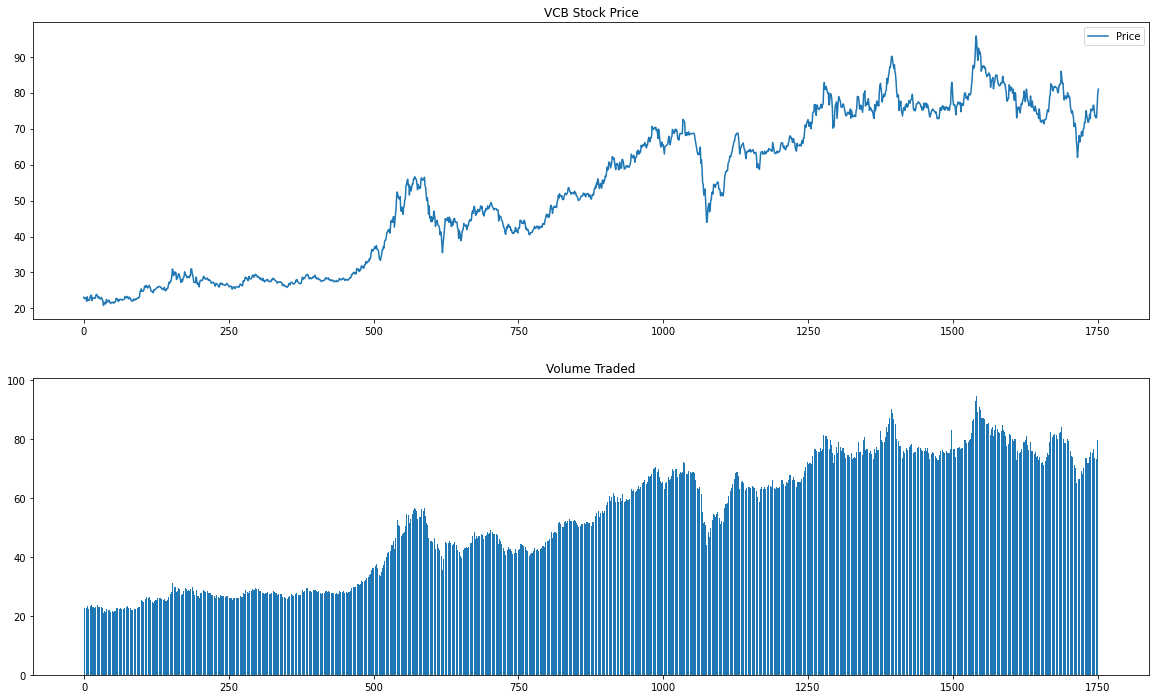

In [54]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.title('VCB Stock Price')
plt.plot(df.Price, label='Price')
plt.legend()
plt.subplot(2,1,2)
plt.title('Volume Traded')
plt.bar(x=df.index, height=df['Price'])
plt.show()

In [55]:
data = list(df['Price'])

In [56]:
#train test split
to_row=int(len(df)*0.9)
training_data=df[0:to_row]['Price']
testing_data=df[0:to_row]['Price']

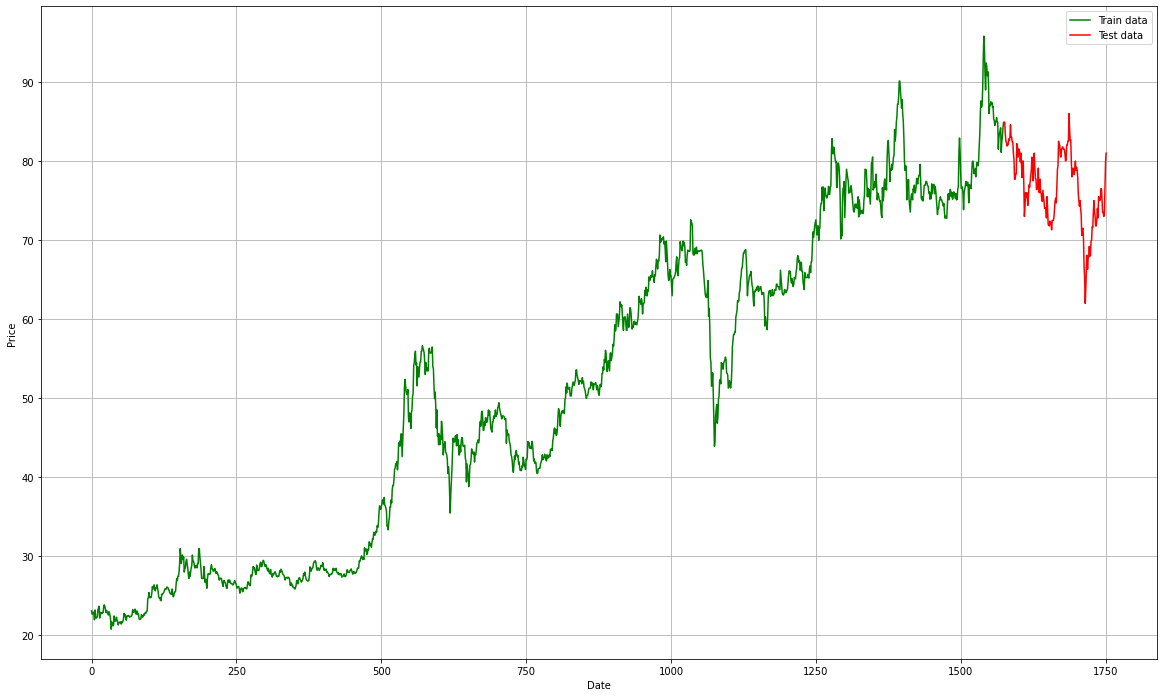

In [57]:
#split data into train and training set
plt.figure(figsize=(20,12))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df[0:to_row]['Price'],'green',label='Train data')
plt.plot(df[to_row:]['Price'],'red',label='Test data')
plt.legend()

In [58]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print("1. ADF: ", result[0])
print("2. p-value: ", result[1])
print("3. Num of Lags: ", result[2])
print("4. Num of Observations Used for ADF Regression: ", result[3])
print("5. Critical Values: ")
for key, val in result[4].items():
    print("\t", key, ": ", val)

1. ADF:  -1.1396862647445123
2. p-value:  0.6989889057140535
3. Num of Lags:  9
4. Num of Observations Used for ADF Regression:  1742
5. Critical Values: 
	 1% :  -3.4341094501874854
	 5% :  -2.8632005876775297
	 10% :  -2.567654048515701


In [11]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.0 MB/s 
     |████████████████████████████████| 9.9 MB 55.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [59]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [60]:
to_row
x_train = df[:to_row]
x_test = df[to_row:]
print(len(x_train), len(x_test))

1576 176


In [61]:
stepwise_fit = auto_arima(data, trace = True, suppress_warnings = True)
print(stepwise_fit.summary)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5095.799, Time=3.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5103.579, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5104.906, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5104.923, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5103.354, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5107.528, Time=1.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5107.558, Time=2.00 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5094.687, Time=3.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5105.172, Time=0.97 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5095.997, Time=8.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5094.638, Time=3.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5105.401, Time=1.19 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=5100.221, Time=4.96 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

In [62]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(2,1,3))
model_2 = sm.tsa.arima.ARIMA(x_train['Price'], order=(2,1,3))

In [63]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1752
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2541.190
Date:                Mon, 02 Jan 2023   AIC                           5094.380
Time:                        12:07:47   BIC                           5127.188
Sample:                             0   HQIC                          5106.508
                               - 1752                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3887      0.048      8.170      0.000       0.295       0.482
ar.L2         -0.8696      0.042    -20.654      0.000      -0.952      -0.787
ma.L1         -0.3709      0.050     -7.378      0.000      -0.469      -0.272
ma.L2          0.8991      0.038     23.737      0.000       0.825       0.973
ma.L3         -0.0267      0.020     -1.367      0.172      -0.065       0.012
sigma2         1.0668      0.023     46.243      0.000       1.022       1.112
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               709.27
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               4.54   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
result2 = model_2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1576
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2213.903
Date:                Mon, 02 Jan 2023   AIC                           4439.805
Time:                        12:07:50   BIC                           4471.977
Sample:                             0   HQIC                          4451.761
                               - 1576                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4057      0.062      6.554      0.000       0.284       0.527
ar.L2         -0.8153      0.051    -15.967      0.000      -0.915      -0.715
ma.L1         -0.3997      0.064     -6.263      0.000      -0.525      -0.275
ma.L2          0.8580      0.048     17.933      0.000       0.764       0.952
ma.L3         -0.0561      0.020     -2.759      0.006      -0.096      -0.016
sigma2         0.9737      0.021     46.400      0.000       0.933       1.015
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               938.72
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               8.00   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
start = len(x_train)
end = len(x_train)+len(x_test)-1
pred = result.predict(start = start, end = end)
pred2 = result2.predict(start = start, end = end)
pred2 

1576    84.695586
1577    84.757975
1578    84.938308
1579    84.960611
1580    84.822637
          ...    
1747    84.849826
1748    84.849826
1749    84.849826
1750    84.849826
1751    84.849826
Name: predicted_mean, Length: 176, dtype: float64

In [66]:
s = pd.Series(pred, index = df.index[to_row:])
s

1576    84.762586
1577    84.978638
1578    83.623348
1579    82.412262
1580    82.264823
          ...    
1747    73.313309
1748    73.140544
1749    73.301821
1750    76.724141
1751    79.790036
Length: 176, dtype: float64

In [67]:
pred

array([84.76258595, 84.97863779, 83.62334785, 82.41226202, 82.26482289,
       81.94688121, 82.12630462, 82.11917447, 82.70759102, 82.56623925,
       83.05362591, 84.69349142, 82.99341501, 82.82505157, 82.37556161,
       82.53037438, 81.05666343, 80.04760842, 77.565185  , 77.73624989,
       78.60988407, 78.46226953, 82.08456568, 81.81160992, 80.47320855,
       81.46680109, 81.57627794, 80.91998165, 79.80239972, 80.9541038 ,
       79.50179313, 77.87307872, 79.93335714, 80.10414974, 76.98810613,
       72.74031417, 74.10092541, 76.37080147, 75.6299004 , 75.69419679,
       75.01099531, 74.5211588 , 75.91023042, 77.08282107, 76.45885732,
       77.21065894, 78.18815216, 79.14862314, 80.45706275, 78.76185922,
       77.34318262, 79.88999795, 81.33321026, 79.09592133, 77.35412102,
       77.64217314, 76.78787485, 77.15902639, 76.25218475, 78.89118045,
       76.28594915, 76.09045178, 77.66837433, 75.93429178, 75.80919151,
       75.0509446 , 74.97315235, 76.32501975, 75.47449119, 74.69

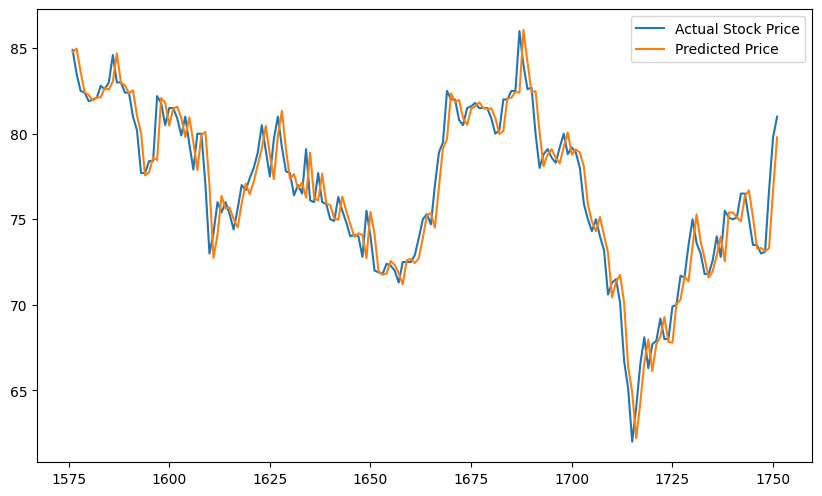

In [68]:
plt.figure(figsize=(10,6), dpi=100)
df['Price'][to_row:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

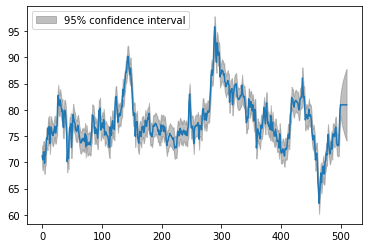

In [69]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result, start=len(df)-500, end=len(df)+10, dynamic = False);

In [70]:
#preducting future 30 days
pred_future = result.predict(start = end, end = end+30)
pred_future

array([79.79003625, 80.99657528, 80.95737174, 80.91278157, 80.9295389 ,
       80.97482897, 80.97786304, 80.93965813, 80.92216772, 80.94859153,
       80.97407336, 80.96100107, 80.9337602 , 80.93453815, 80.95852932,
       80.96717927, 80.94967909, 80.93535396, 80.94500335, 80.96121168,
       80.95912144, 80.94421407, 80.94023657, 80.95165384, 80.95955109,
       80.95269261, 80.94315894, 80.94541693, 80.95458522, 80.9561858 ,
       80.94883524])

In [71]:
import datetime
start_date = datetime.datetime(2022,12,1)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [72]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-01    79.790036
2022-12-02    80.996575
2022-12-03    80.957372
2022-12-04    80.912782
2022-12-05    80.929539
2022-12-06    80.974829
2022-12-07    80.977863
2022-12-08    80.939658
2022-12-09    80.922168
2022-12-10    80.948592
2022-12-11    80.974073
2022-12-12    80.961001
2022-12-13    80.933760
2022-12-14    80.934538
2022-12-15    80.958529
2022-12-16    80.967179
2022-12-17    80.949679
2022-12-18    80.935354
2022-12-19    80.945003
2022-12-20    80.961212
2022-12-21    80.959121
2022-12-22    80.944214
2022-12-23    80.940237
2022-12-24    80.951654
2022-12-25    80.959551
2022-12-26    80.952693
2022-12-27    80.943159
2022-12-28    80.945417
2022-12-29    80.954585
2022-12-30    80.956186
2022-12-31    80.948835
dtype: float64

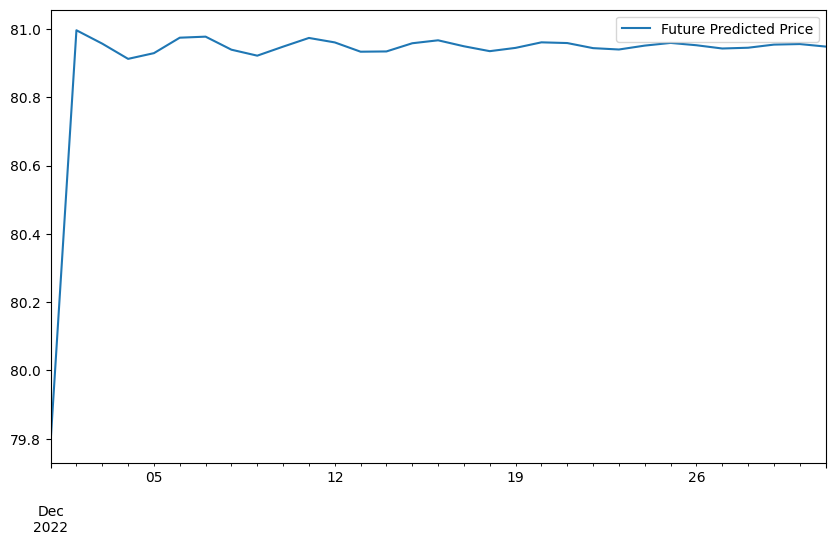

In [73]:
plt.figure(figsize=(10,6), dpi=100)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [74]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [75]:
#Using MAE to measure the accuracy of a model
mape = mean_absolute_percentage_error(x_test.Price, pred2)
mse = mean_squared_error(x_test.Price, pred2)
rmse = np.sqrt(mse)
print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.0f}")
print(f"MSE: {mse:.2f}")

MAPE: 11.04%
RMSE: 9
MSE: 87.39


In [76]:
x_test.Price

1576    84.9
1577    83.5
1578    82.5
1579    82.4
1580    81.9
        ... 
1747    73.0
1748    73.1
1749    76.7
1750    79.8
1751    81.0
Name: Price, Length: 176, dtype: float64